<a href="https://colab.research.google.com/github/im-rk19/Trying-to-figure-out-git-lmao/blob/master/backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas_datareader import data
import pandas as pd
import numpy as np

In [0]:
def read_data(stock_list,days):
  df = pd.DataFrame()
  for ticker in stock_list:
    df[ticker] = data.DataReader(ticker,'yahoo',start='1/1/2016')['Adj Close']

  return df.head(days)

In [0]:
def RSI(price_data):
  delta = price_data.diff()
  up, down = delta.copy(), delta.copy()
  up[up<0] = 0
  down[down>0] = 0

  roll_up = up.mean()
  roll_down = down.abs().mean()

  RS = roll_up/roll_down
  RSI = (100.0 - (100.0/(1.0 + RS)))[0]

  if(RSI> 70): 
    return 1 #over bought
  elif(RSI>=30 and RSI <=70):
    return 0
  else:
    return -1 

In [0]:
portfolio = 500
days = 750
stock_list = ['DABUR.NS']
prices = read_data(stock_list,days)

nav = pd.DataFrame(index = prices.tail(days-14).index)
nav = nav.assign(leftover = np.zeros(days-14), stock = np.zeros(days-14))

nav.iloc[0,0] = portfolio

In [0]:
signal = 0
prev_signal = 0
for index, row in nav.iloc[1:].iterrows():
  signal = np.sign(signal + RSI(prices.loc[:index].tail(14)))
  leftover = nav.loc[:index].tail(2).head(1).iloc[0,0]

  if(signal == -1):
    nav.loc[index,'leftover'] = leftover
    nav.loc[index,'stock'] = 0
    continue
  
  if(prev_signal == 0 and signal == 1):
    #BUY
    nav.loc[index,'leftover'] = leftover - prices.loc[index][0]
    nav.loc[index,'stock'] = prices.loc[index][0]

  if(prev_signal == 1 and signal ==1):
    #HOLD
    nav.loc[index,'leftover'] = leftover 
    nav.loc[index,'stock'] = prices.loc[index][0]
  
  if(prev_signal == 1 and signal ==0):
    #SELL
    nav.loc[index,'leftover'] = leftover + prices.loc[index][0]
    nav.loc[index,'stock'] = 0

  if(prev_signal == 0 and signal ==0):
    #WAIT
    nav.loc[index,'leftover'] = leftover 
    nav.loc[index,'stock'] = 0
  
  prev_signal = signal
    

In [53]:
nav.head(150)

,leftover,stock
Date,,
2016-01-21,500.000000,0.0
2016-01-22,500.000000,0.0
2016-01-25,500.000000,0.0
2016-01-27,500.000000,0.0
2016-01-28,500.000000,0.0
...,...,...
2016-08-24,452.758698,0.0
2016-08-25,452.758698,0.0
2016-08-26,452.758698,0.0


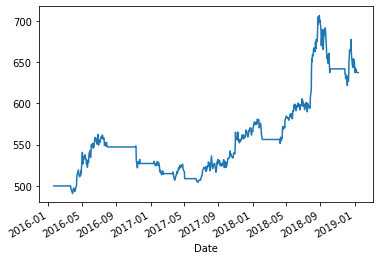

In [58]:
nav.sum(axis=1).plot()

In [52]:
prices

,DABUR.NS
Date,
2016-01-01,261.841431
2016-01-04,262.315125
2016-01-05,261.415131
2016-01-06,261.367828
2016-01-07,253.599701
...,...
2019-01-08,412.301300
2019-01-09,417.351074
2019-01-10,417.004517
